In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('bank-additional-full.csv',sep=';')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
plt.rcParams['figure.figsize']=(15,10)

In [2]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.shape

(41188, 21)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Eliminating unwanted features:

'Default'

In [5]:
pd.crosstab(data['y'],data['default'])
#as we can see there are only 3 defaulters in the dataset none of whom have subscribed to the term deposit, 
#this column will not be useful for analysis

default,no,unknown,yes
y,,,
no,28391,8154,3
yes,4197,443,0


<AxesSubplot:xlabel='default'>

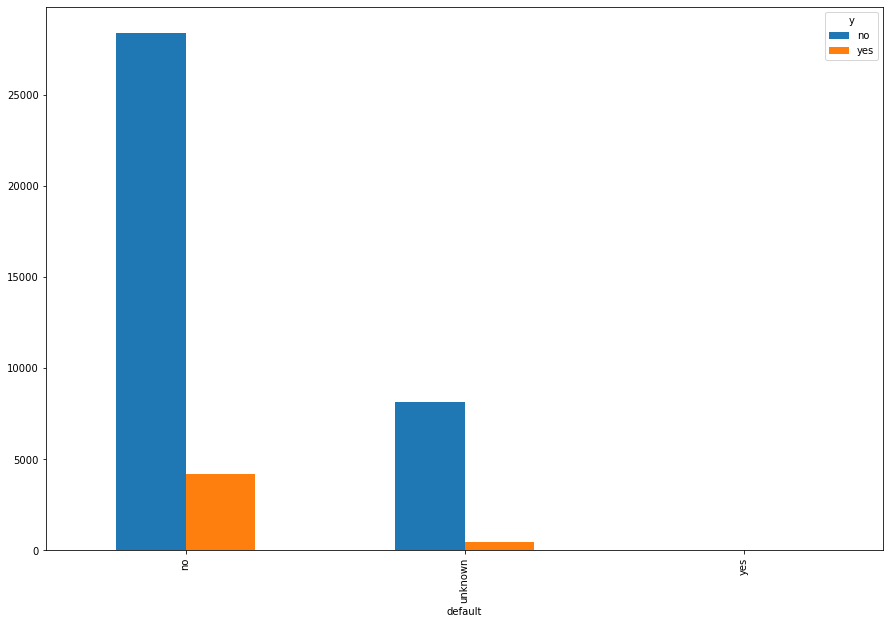

In [6]:
pd.crosstab(data['y'],data['default']).T.plot(kind='bar')

In [7]:
data.drop(['default'],axis=1,inplace=True)

'Contact'

In [8]:
pd.crosstab(data.contact,data['y'],normalize=True)

y,no,yes
contact,,
cellular,0.541201,0.093547
telephone,0.346145,0.019108


<AxesSubplot:>

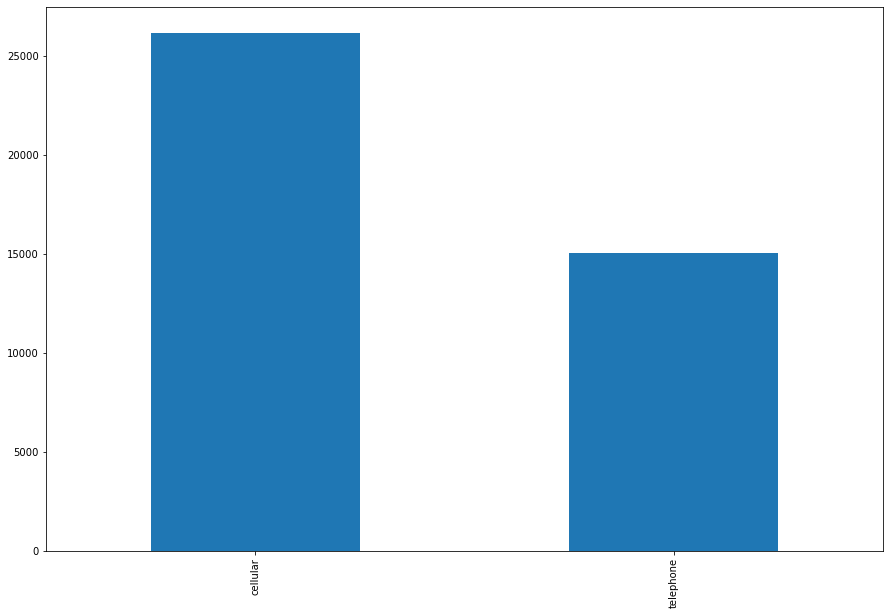

In [9]:
data.contact.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='contact'>

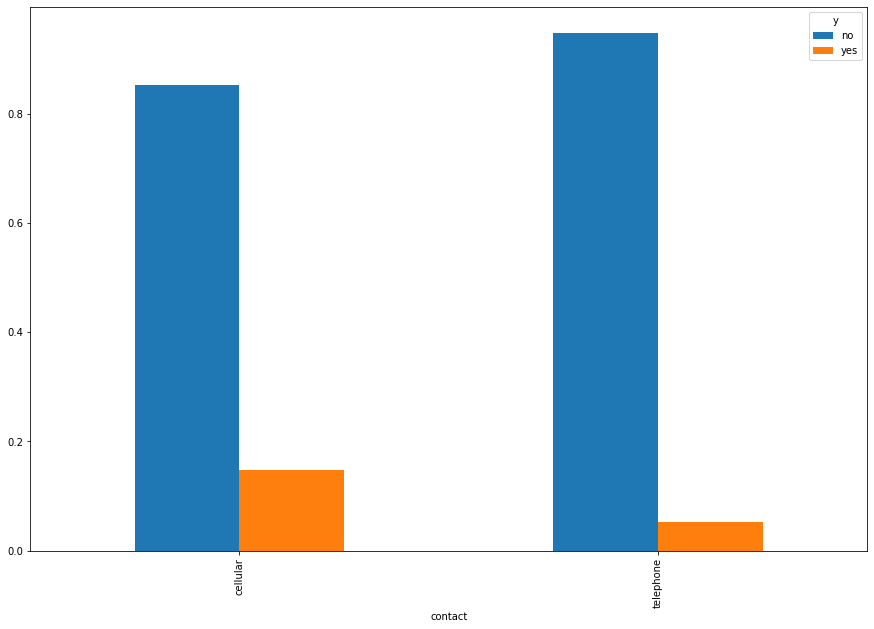

In [10]:
pd.crosstab(data.contact,data['y'],normalize='index').plot(kind='bar')
#from the graph both modes of contact are offering same percentage of conversions hence we can drop this column.

In [11]:
data.drop(['contact'],axis=True,inplace=True)

'Duration'

In [12]:
data.duration.unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [13]:
#this attribute highly affects the output target (e.g., if duration=0 then y='no').
#the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
#Thus, this input should only be included for benchmark purposes and should be discarded
#since our the intention is to have a realistic predictive model.

In [14]:
data.drop(['duration'],axis=1,inplace=True)

'pdays'

In [19]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [20]:
data['previous_campaign_contacted']=data['pdays'].apply(lambda x:'no' if x==999 else 'yes' )
#since there are many rows where the customer hasnt been contacted,
#hence we are converting it into a categrical binary column to chec k ehther they are contacted or not.

In [21]:
data['previous_campaign_contacted'].value_counts()

no     39673
yes     1515
Name: previous_campaign_contacted, dtype: int64

In [22]:
data=data.drop('pdays',1)

Typecasting the features:

'previous'

In [16]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [17]:
data['previous']=data['previous'].astype(object)

Since there are only 7 categories in the 'previous' column, we treat it as a categorical variable.

In [23]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_campaign_contacted
0,56,housemaid,married,basic.4y,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,yes,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,yes,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


In [24]:
data.dtypes

age                              int64
job                             object
marital                         object
education                       object
housing                         object
loan                            object
month                           object
day_of_week                     object
campaign                         int64
previous                        object
poutcome                        object
emp.var.rate                   float64
cons.price.idx                 float64
cons.conf.idx                  float64
euribor3m                      float64
nr.employed                    float64
y                               object
previous_campaign_contacted     object
dtype: object

Splitting the data into numerical and categorical:

In [25]:
num_data = data.select_dtypes(include = np.number)
num_data

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,1.1,93.994,-36.4,4.857,5191.0
1,57,1,1.1,93.994,-36.4,4.857,5191.0
2,37,1,1.1,93.994,-36.4,4.857,5191.0
3,40,1,1.1,93.994,-36.4,4.857,5191.0
4,56,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...
41183,73,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,-1.1,94.767,-50.8,1.028,4963.6


In [26]:
num_data.shape

(41188, 7)

In [27]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data

,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,yes,no,nov,fri,0,nonexistent,yes,no
41184,blue-collar,married,professional.course,no,no,nov,fri,0,nonexistent,no,no
41185,retired,married,university.degree,yes,no,nov,fri,0,nonexistent,no,no
41186,technician,married,professional.course,no,no,nov,fri,0,nonexistent,yes,no


In [28]:
cat_data.shape

(41188, 11)

Checking the skewness in the numerical data:

In [29]:
num_data.skew()

age               0.784697
campaign          4.762507
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

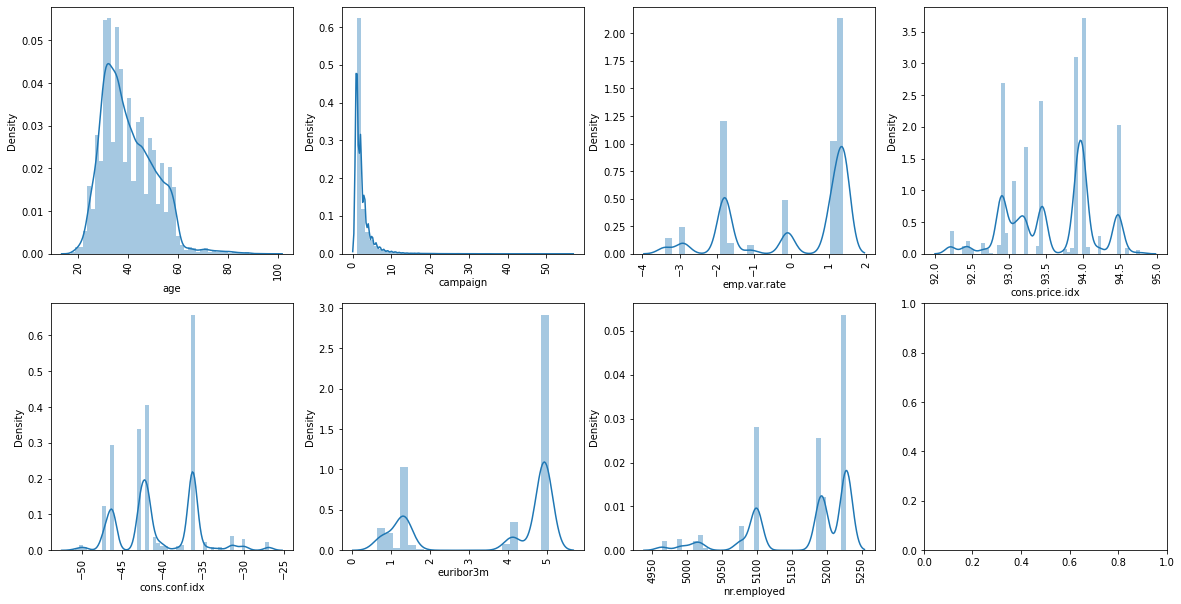

In [30]:
num_columns = num_data.columns

fig,ax=plt.subplots(2,4,figsize=(20,10))
for i,subplot in zip(num_columns,ax.flatten()):
    sns.distplot(num_data[i],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Transforming the Numerical Data

In [31]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
num_data=pd.DataFrame(pt.fit_transform(num_data),columns=num_data.columns)
num_data

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
1,1.492292,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
2,-0.158076,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
3,0.150155,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
4,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
...,...,...,...,...,...,...,...
41183,2.374350,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117
41184,0.691113,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117
41185,1.427459,0.245075,-1.013456,2.284977,-2.484063,-1.452568,-1.941117
41186,0.520671,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117


In [32]:
num_data.shape

(41188, 7)

In [33]:
num_data.skew()

age               0.007336
campaign          0.268430
emp.var.rate     -0.414214
cons.price.idx   -0.038410
cons.conf.idx     0.047975
euribor3m        -0.649814
nr.employed      -0.502649
dtype: float64

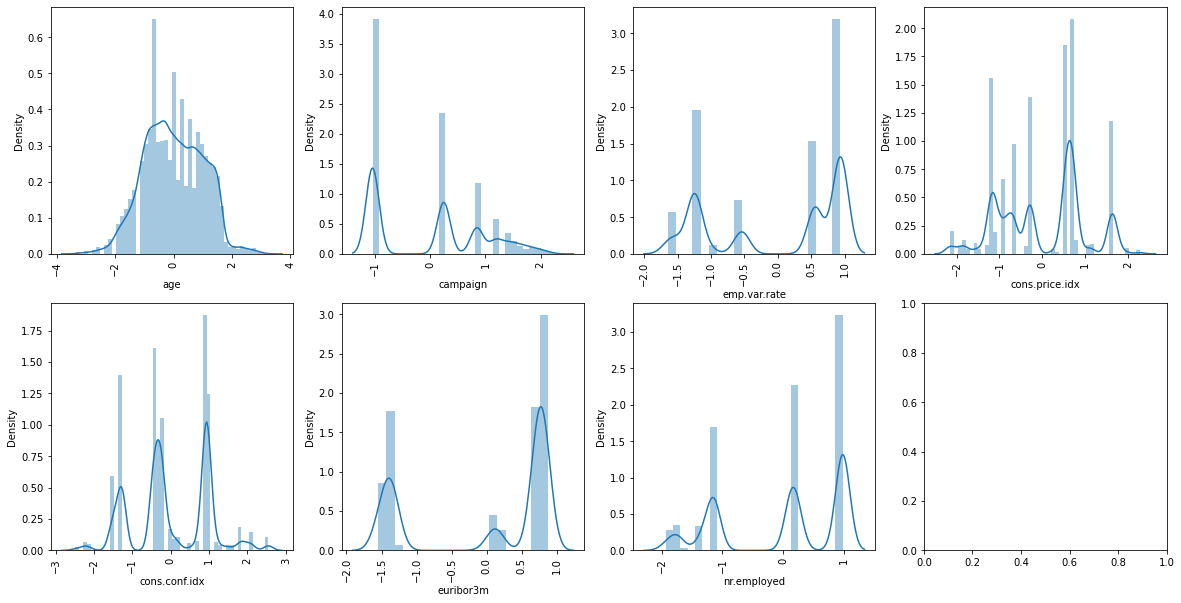

In [34]:
num_columns = num_data.columns

fig,ax=plt.subplots(2,4,figsize=(20,10))
for i,subplot in zip(num_columns,ax.flatten()):
    sns.distplot(num_data[i],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Treating the Outliers

In [35]:
data = pd.concat([num_data,cat_data],axis=1)
data

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,1.492292,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,-0.158076,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,0.150155,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,retired,married,professional.course,yes,no,nov,fri,0,nonexistent,yes,no
41184,0.691113,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,blue-collar,married,professional.course,no,no,nov,fri,0,nonexistent,no,no
41185,1.427459,0.245075,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,retired,married,university.degree,yes,no,nov,fri,0,nonexistent,no,no
41186,0.520671,-1.045497,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,technician,married,professional.course,no,no,nov,fri,0,nonexistent,yes,no


In [36]:
data.shape

(41188, 18)

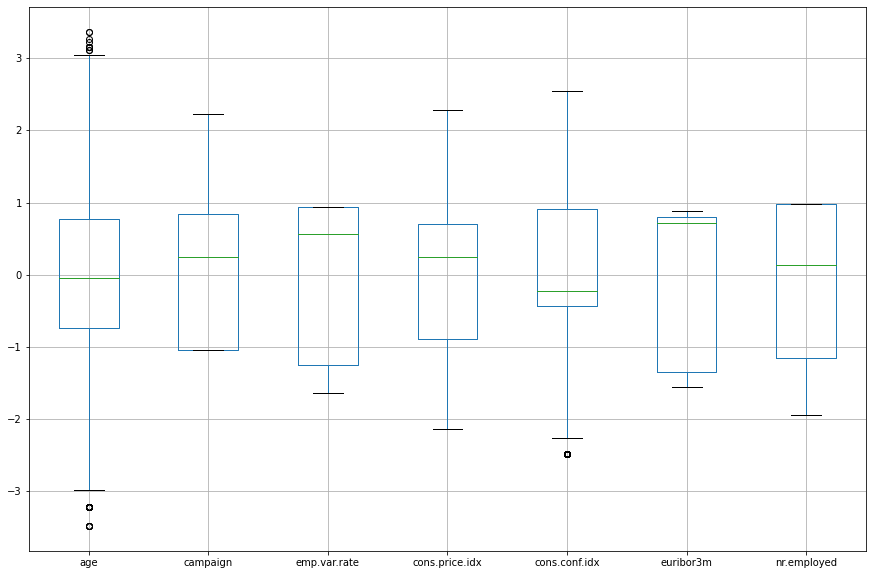

In [37]:
data.boxplot()
plt.show()

In [38]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
ub=Q3+(1.5*IQR)
lb=Q1-(1.5*IQR)
data=data[~(((data<lb)| (data>ub)).any(axis=1))]

In [48]:
data.reset_index(drop=True,inplace=True)

In [51]:
data.drop(['level_0','index'],axis=1,inplace=True)

In [52]:
data.shape

(41019, 18)

Since the shape of the data has been changed from (41188, 18) to (41019, 18) we can infer that there are 169 outliers which have
been dropped.

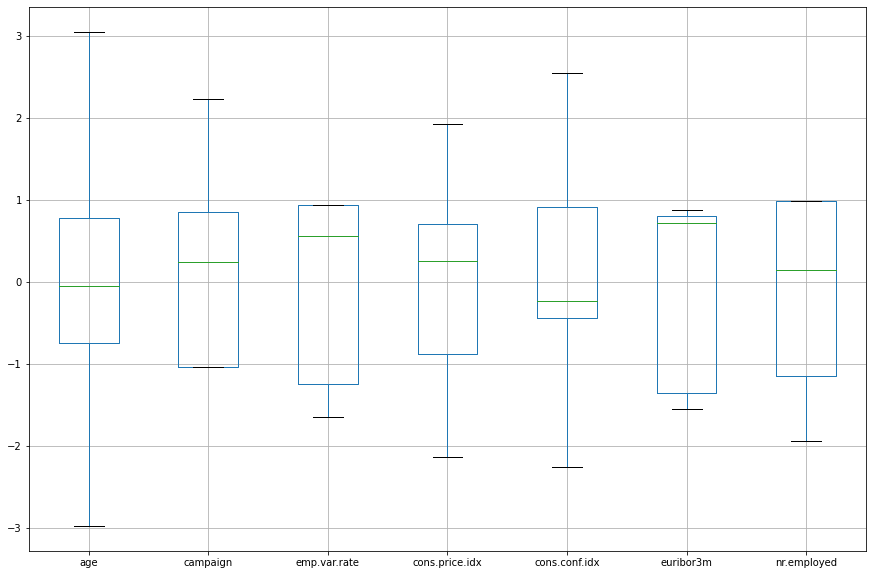

In [53]:
data.boxplot()
plt.show()

Splitting the data again after removing the Outliers:

In [54]:
num_data=data.select_dtypes(include=np.number)
num_data

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
1,1.492292,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
2,-0.158076,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
3,0.150155,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
4,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
...,...,...,...,...,...,...,...
41014,-1.451264,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41015,1.678864,0.245075,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41016,-1.010359,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41017,1.966122,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117


In [55]:
cat_data=data.select_dtypes(exclude=np.number)

In [56]:
cat_data

,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...
41014,technician,single,university.degree,yes,no,oct,wed,1,failure,yes,no
41015,retired,married,professional.course,no,yes,oct,wed,1,failure,no,no
41016,management,married,university.degree,no,yes,oct,wed,1,success,yes,yes
41017,retired,married,basic.4y,yes,no,oct,wed,3,success,yes,yes


Scaling the Numerical Data

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_data_scaled=pd.DataFrame(ss.fit_transform(num_data),columns=num_data.columns)

In [58]:
num_data

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
1,1.492292,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
2,-0.158076,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
3,0.150155,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
4,1.427459,-1.045497,0.561017,0.700791,0.911782,0.713660,0.140827
...,...,...,...,...,...,...,...
41014,-1.451264,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41015,1.678864,0.245075,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41016,-1.010359,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117
41017,1.966122,-1.045497,-1.013456,1.923697,-2.131942,-1.448313,-1.941117


In [59]:
num_data_scaled

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.433645,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901
1,1.498831,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901
2,-0.160524,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901
3,0.149385,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901
4,1.433645,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901
...,...,...,...,...,...,...,...
41014,-1.460754,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805
41015,1.686419,0.24366,-1.018629,1.943891,-2.158188,-1.457657,-1.958805
41016,-1.017449,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805
41017,1.975241,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805


Checking the Multicollinearity in the numerical data:

<AxesSubplot:>

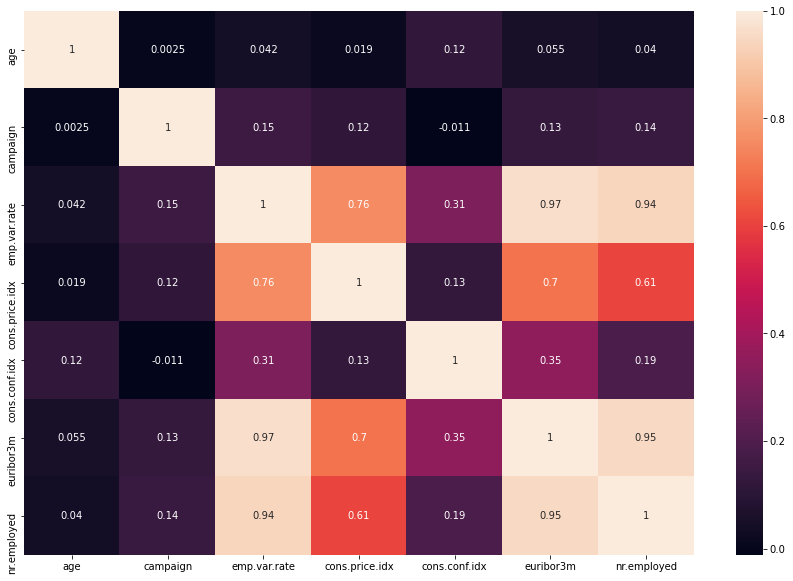

In [60]:
sns.heatmap(num_data_scaled.corr(),annot=True)

In [61]:
num_data.columns

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

The columns: 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed' are showing multicoliinearity. So we are doing PCA to remove the multicollinearity.

In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_model=pca.fit(num_data_scaled[['emp.var.rate', 'cons.price.idx', 'euribor3m','nr.employed']])
exp_var=pca_model.explained_variance_ratio_

In [64]:
exp_var

array([0.87089339, 0.11196037, 0.01009428, 0.00705195])

In [66]:
pc_values=pca_model.components_[:1]

In [68]:
pca_dim=np.dot(num_data_scaled[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m']],pc_values.T)
pca_values=pd.DataFrame(pca_dim,columns=['pca_dim1'])
pca_values.shape

(41019, 1)

In [69]:
num_data_scaled=pd.concat([num_data_scaled,pca_values],1)
num_data_scaled

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pca_dim1
0,1.433645,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901,-1.441758
1,1.498831,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901,-1.441758
2,-0.160524,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901,-1.441758
3,0.149385,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901,-1.441758
4,1.433645,-1.04628,0.556763,0.712078,0.913177,0.709338,0.133901,-1.441758
...,...,...,...,...,...,...,...,...
41014,-1.460754,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805,1.566154
41015,1.686419,0.24366,-1.018629,1.943891,-2.158188,-1.457657,-1.958805,1.566154
41016,-1.017449,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805,1.566154
41017,1.975241,-1.04628,-1.018629,1.943891,-2.158188,-1.457657,-1.958805,1.566154


In [70]:
num_data_final=num_data_scaled.drop(['emp.var.rate', 'cons.price.idx', 'nr.employed','euribor3m'],1)
num_data_final

,age,campaign,cons.conf.idx,pca_dim1
0,1.433645,-1.04628,0.913177,-1.441758
1,1.498831,-1.04628,0.913177,-1.441758
2,-0.160524,-1.04628,0.913177,-1.441758
3,0.149385,-1.04628,0.913177,-1.441758
4,1.433645,-1.04628,0.913177,-1.441758
...,...,...,...,...
41014,-1.460754,-1.04628,-2.158188,1.566154
41015,1.686419,0.24366,-2.158188,1.566154
41016,-1.017449,-1.04628,-2.158188,1.566154
41017,1.975241,-1.04628,-2.158188,1.566154


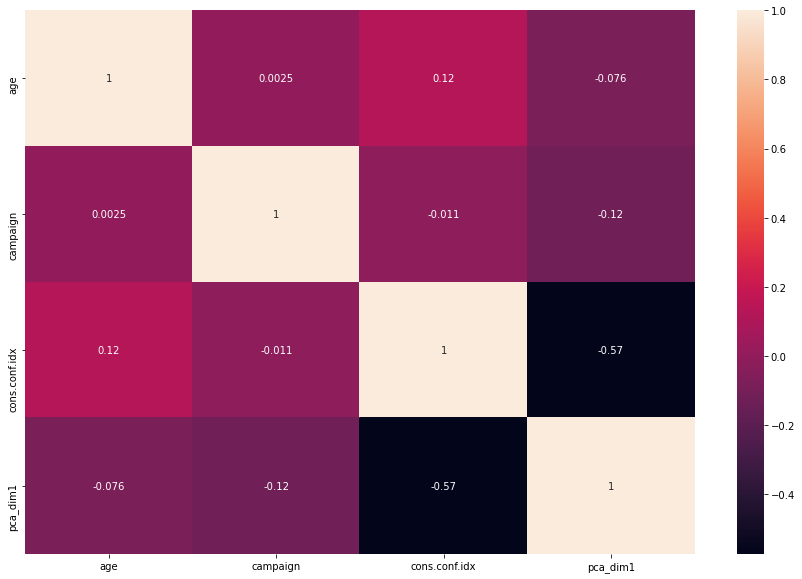

In [72]:
sns.heatmap(num_data_final.corr(),annot=True)
plt.show()

The multicollinearity has been removed.

Data Pre-Processing of the Categorical Data:

In [73]:
cat_data

,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...
41014,technician,single,university.degree,yes,no,oct,wed,1,failure,yes,no
41015,retired,married,professional.course,no,yes,oct,wed,1,failure,no,no
41016,management,married,university.degree,no,yes,oct,wed,1,success,yes,yes
41017,retired,married,basic.4y,yes,no,oct,wed,3,success,yes,yes


Treating Unknown Values in the categorical data

In [75]:
cat_data.replace({'unknown':np.nan},inplace=True)
cat_data

,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...
41014,technician,single,university.degree,yes,no,oct,wed,1,failure,yes,no
41015,retired,married,professional.course,no,yes,oct,wed,1,failure,no,no
41016,management,married,university.degree,no,yes,oct,wed,1,success,yes,yes
41017,retired,married,basic.4y,yes,no,oct,wed,3,success,yes,yes


In [77]:
cat_data.isnull().sum()

job                             329
marital                          80
education                      1702
housing                         987
loan                            987
month                             0
day_of_week                       0
previous                          0
poutcome                          0
y                                 0
previous_campaign_contacted       0
dtype: int64

In [78]:
for i in cat_data.columns:
    print(cat_data[i].value_counts(dropna=False))
    print('*'*100)

admin.           10373
blue-collar       9242
technician        6719
services          3962
management        2919
retired           1700
entrepreneur      1455
self-employed     1420
housemaid         1055
unemployed        1010
student            835
NaN                329
Name: job, dtype: int64
****************************************************************************************************
married     24851
single      11494
divorced     4594
NaN            80
Name: marital, dtype: int64
****************************************************************************************************
university.degree      12116
high.school             9483
basic.9y                6031
professional.course     5219
basic.4y                4164
basic.6y                2286
NaN                     1702
illiterate                18
Name: education, dtype: int64
****************************************************************************************************
yes    21472
no     18560
NaN      

In [79]:
cat_data['job'].value_counts(dropna=False, normalize=True)*100

admin.           25.288281
blue-collar      22.531022
technician       16.380214
services          9.658939
management        7.116214
retired           4.144421
entrepreneur      3.547137
self-employed     3.461810
housemaid         2.571979
unemployed        2.462274
student           2.035642
NaN               0.802067
Name: job, dtype: float64

There are 0.8% NaN values in the job column. 

'marital'

In [81]:
cat_data['marital'].value_counts(dropna=False, normalize=True)*100

married     60.584120
single      28.021161
divorced    11.199688
NaN          0.195032
Name: marital, dtype: float64

In [82]:
data.groupby('marital')['age'].mean()

marital
divorced    0.474895
married     0.240906
single     -0.705170
unknown     0.019486
Name: age, dtype: float64

Since the average age of the married and divorced people is almost same so we cannot estimate the marital status of unknowns
through the 'age' variable alone.

In [83]:
cat_data['education'].value_counts(dropna=False,normalize=True)*100

university.degree      29.537531
high.school            23.118555
basic.9y               14.702943
professional.course    12.723372
basic.4y               10.151393
basic.6y                5.573027
NaN                     4.149297
illiterate              0.043882
Name: education, dtype: float64

There are 4% nan values in this column

'housing'

In [85]:
cat_data['housing'].value_counts(dropna=False,normalize=True)*100

yes    52.346474
no     45.247324
NaN     2.406202
Name: housing, dtype: float64

'loan'

In [86]:
cat_data['loan'].value_counts(dropna=False,normalize=True)*100

no     82.413028
yes    15.180770
NaN     2.406202
Name: loan, dtype: float64

As we can see that the number of null values in both the features 'housing' and 'loan' are the same, it is possible that 
they have null values in the same record. 

In [89]:
num_data_final.shape

(41019, 4)

In [90]:
cat_data.shape

(41019, 11)

In [87]:
data = pd.concat([num_data_final,cat_data],axis=1)

In [88]:
data.shape

(41019, 15)

In [95]:
data=data.dropna(subset=['housing'],axis=0)

In [101]:
data.reset_index(drop=True,inplace=True)

In [102]:
data

,age,campaign,cons.conf.idx,pca_dim1,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,1.433645,-1.04628,0.913177,-1.441758,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,1.498831,-1.04628,0.913177,-1.441758,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,-0.160524,-1.04628,0.913177,-1.441758,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,0.149385,-1.04628,0.913177,-1.441758,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,1.433645,-1.04628,0.913177,-1.441758,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40027,-1.460754,-1.04628,-2.158188,1.566154,technician,single,university.degree,yes,no,oct,wed,1,failure,yes,no
40028,1.686419,0.24366,-2.158188,1.566154,retired,married,professional.course,no,yes,oct,wed,1,failure,no,no
40029,-1.017449,-1.04628,-2.158188,1.566154,management,married,university.degree,no,yes,oct,wed,1,success,yes,yes
40030,1.975241,-1.04628,-2.158188,1.566154,retired,married,basic.4y,yes,no,oct,wed,3,success,yes,yes


In [103]:
data.isna().sum()

age                               0
campaign                          0
cons.conf.idx                     0
pca_dim1                          0
job                             324
marital                          79
education                      1663
housing                           0
loan                              0
month                             0
day_of_week                       0
previous                          0
poutcome                          0
y                                 0
previous_campaign_contacted       0
dtype: int64

As we can infer from the above output that after dropping the null values in the 'housing' column alone the null values in the
'loan' column are also dropped. Hence, we conclude that the rows in both the columns having null values are the same.

For the columns: 'job','marital','education' we will use knn imputer for null values.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40032 entries, 0 to 40031
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          40032 non-null  float64
 1   campaign                     40032 non-null  float64
 2   cons.conf.idx                40032 non-null  float64
 3   pca_dim1                     40032 non-null  float64
 4   job                          39708 non-null  object 
 5   marital                      39953 non-null  object 
 6   education                    38369 non-null  object 
 7   housing                      40032 non-null  object 
 8   loan                         40032 non-null  object 
 9   month                        40032 non-null  object 
 10  day_of_week                  40032 non-null  object 
 11  previous                     40032 non-null  int64  
 12  poutcome                     40032 non-null  object 
 13  y               

Encoding the categorical data:

In [111]:
data.head()

,age,campaign,cons.conf.idx,pca_dim1,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,1.433645,-1.04628,0.913177,-1.441758,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,1.498831,-1.04628,0.913177,-1.441758,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,-0.160524,-1.04628,0.913177,-1.441758,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,0.149385,-1.04628,0.913177,-1.441758,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,1.433645,-1.04628,0.913177,-1.441758,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no


In [112]:
data.shape

(40032, 15)

In [114]:
data['previous']=data['previous'].astype(object)

In [115]:
num_data_final= data.select_dtypes(include=np.number)
num_data_final

,age,campaign,cons.conf.idx,pca_dim1
0,1.433645,-1.04628,0.913177,-1.441758
1,1.498831,-1.04628,0.913177,-1.441758
2,-0.160524,-1.04628,0.913177,-1.441758
3,0.149385,-1.04628,0.913177,-1.441758
4,1.433645,-1.04628,0.913177,-1.441758
...,...,...,...,...
40027,-1.460754,-1.04628,-2.158188,1.566154
40028,1.686419,0.24366,-2.158188,1.566154
40029,-1.017449,-1.04628,-2.158188,1.566154
40030,1.975241,-1.04628,-2.158188,1.566154


In [116]:
num_data_final.shape

(40032, 4)

In [118]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data

,job,marital,education,housing,loan,month,day_of_week,previous,poutcome,y,previous_campaign_contacted
0,housemaid,married,basic.4y,no,no,may,mon,0,nonexistent,no,no
1,services,married,high.school,no,no,may,mon,0,nonexistent,no,no
2,services,married,high.school,yes,no,may,mon,0,nonexistent,no,no
3,admin.,married,basic.6y,no,no,may,mon,0,nonexistent,no,no
4,services,married,high.school,no,yes,may,mon,0,nonexistent,no,no
...,...,...,...,...,...,...,...,...,...,...,...
40027,technician,single,university.degree,yes,no,oct,wed,1,failure,yes,no
40028,retired,married,professional.course,no,yes,oct,wed,1,failure,no,no
40029,management,married,university.degree,no,yes,oct,wed,1,success,yes,yes
40030,retired,married,basic.4y,yes,no,oct,wed,3,success,yes,yes


In [119]:
cat_data.shape

(40032, 11)

In [120]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df=pd.DataFrame()
for i in ['housing', 'loan', 'month',
       'day_of_week', 'poutcome',
       'previous_campaign_contacted']:
    
    df[i]=le.fit_transform(cat_data[i].values)
df
    

,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted
0,0,0,6,1,1,0
1,0,0,6,1,1,0
2,1,0,6,1,1,0
3,0,0,6,1,1,0
4,0,1,6,1,1,0
...,...,...,...,...,...,...
40027,1,0,8,4,0,0
40028,0,1,8,4,0,0
40029,0,1,8,4,2,1
40030,1,0,8,4,2,1


In [122]:
cat_data_encoded = df
cat_data_encoded

,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted
0,0,0,6,1,1,0
1,0,0,6,1,1,0
2,1,0,6,1,1,0
3,0,0,6,1,1,0
4,0,1,6,1,1,0
...,...,...,...,...,...,...
40027,1,0,8,4,0,0
40028,0,1,8,4,0,0
40029,0,1,8,4,2,1
40030,1,0,8,4,2,1


Encoding the categorical variables with null values:

'education'

In [123]:
cat_data['education']=cat_data['education'].replace({'basic.4y': 0,
 'high.school': 3,
 'basic.6y': 1,
 'basic.9y': 2,
 'professional.course': 5,
 'university.degree': 6,
'illiterate':4})

In [124]:
cat_data['education'].value_counts(dropna=False)

6.0    11840
3.0     9263
2.0     5881
5.0     5094
0.0     4047
1.0     2226
NaN     1663
4.0       18
Name: education, dtype: int64

'marital'

In [125]:
cat_data['marital']=cat_data['marital'].replace({'married': 1, 'single': 2, 'divorced': 0})

In [126]:
cat_data['marital'].value_counts(dropna=False)

1.0    24263
2.0    11216
0.0     4474
NaN       79
Name: marital, dtype: int64

In [128]:
cat_data['job']=cat_data['job'].replace({'housemaid': 3,
 'services': 7,
 'admin.': 0,
 'blue-collar': 1,
 'technician': 9,
 'retired': 5,
 'management': 4,
 'unemployed': 10,
 'self-employed': 6,
 'entrepreneur': 2,
 'student':8})

In [129]:
cat_data['job'].value_counts(dropna=False)

0.0     10146
1.0      9002
9.0      6572
7.0      3862
4.0      2848
5.0      1656
2.0      1419
6.0      1380
3.0      1026
10.0      983
8.0       814
NaN       324
Name: job, dtype: int64

In [130]:
cat_data_encoded['job']=cat_data['job']
cat_data_encoded

,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted,job
0,0,0,6,1,1,0,3.0
1,0,0,6,1,1,0,7.0
2,1,0,6,1,1,0,7.0
3,0,0,6,1,1,0,0.0
4,0,1,6,1,1,0,7.0
...,...,...,...,...,...,...,...
40027,1,0,8,4,0,0,9.0
40028,0,1,8,4,0,0,5.0
40029,0,1,8,4,2,1,4.0
40030,1,0,8,4,2,1,5.0


In [131]:
cat_data_encoded['marital']=cat_data['marital']
cat_data_encoded['education']=cat_data['education']

In [132]:
cat_data_encoded

,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted,job,marital,education
0,0,0,6,1,1,0,3.0,1.0,0.0
1,0,0,6,1,1,0,7.0,1.0,3.0
2,1,0,6,1,1,0,7.0,1.0,3.0
3,0,0,6,1,1,0,0.0,1.0,1.0
4,0,1,6,1,1,0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
40027,1,0,8,4,0,0,9.0,2.0,6.0
40028,0,1,8,4,0,0,5.0,1.0,5.0
40029,0,1,8,4,2,1,4.0,1.0,6.0
40030,1,0,8,4,2,1,5.0,1.0,0.0


In [133]:
num_data_final

,age,campaign,cons.conf.idx,pca_dim1
0,1.433645,-1.04628,0.913177,-1.441758
1,1.498831,-1.04628,0.913177,-1.441758
2,-0.160524,-1.04628,0.913177,-1.441758
3,0.149385,-1.04628,0.913177,-1.441758
4,1.433645,-1.04628,0.913177,-1.441758
...,...,...,...,...
40027,-1.460754,-1.04628,-2.158188,1.566154
40028,1.686419,0.24366,-2.158188,1.566154
40029,-1.017449,-1.04628,-2.158188,1.566154
40030,1.975241,-1.04628,-2.158188,1.566154


In [135]:
num_data_final.shape

(40032, 4)

In [136]:
cat_data_encoded

,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted,job,marital,education
0,0,0,6,1,1,0,3.0,1.0,0.0
1,0,0,6,1,1,0,7.0,1.0,3.0
2,1,0,6,1,1,0,7.0,1.0,3.0
3,0,0,6,1,1,0,0.0,1.0,1.0
4,0,1,6,1,1,0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
40027,1,0,8,4,0,0,9.0,2.0,6.0
40028,0,1,8,4,0,0,5.0,1.0,5.0
40029,0,1,8,4,2,1,4.0,1.0,6.0
40030,1,0,8,4,2,1,5.0,1.0,0.0


In [137]:
cat_data_encoded.shape

(40032, 9)

In [138]:
data_final = pd.concat([num_data_final,cat_data_encoded],axis=1)
data_final

,age,campaign,cons.conf.idx,pca_dim1,housing,loan,month,day_of_week,poutcome,previous_campaign_contacted,job,marital,education
0,1.433645,-1.04628,0.913177,-1.441758,0,0,6,1,1,0,3.0,1.0,0.0
1,1.498831,-1.04628,0.913177,-1.441758,0,0,6,1,1,0,7.0,1.0,3.0
2,-0.160524,-1.04628,0.913177,-1.441758,1,0,6,1,1,0,7.0,1.0,3.0
3,0.149385,-1.04628,0.913177,-1.441758,0,0,6,1,1,0,0.0,1.0,1.0
4,1.433645,-1.04628,0.913177,-1.441758,0,1,6,1,1,0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40027,-1.460754,-1.04628,-2.158188,1.566154,1,0,8,4,0,0,9.0,2.0,6.0
40028,1.686419,0.24366,-2.158188,1.566154,0,1,8,4,0,0,5.0,1.0,5.0
40029,-1.017449,-1.04628,-2.158188,1.566154,0,1,8,4,2,1,4.0,1.0,6.0
40030,1.975241,-1.04628,-2.158188,1.566154,1,0,8,4,2,1,5.0,1.0,0.0


In [139]:
data_final.shape

(40032, 13)

In [140]:
data_final.columns

Index(['age', 'campaign', 'cons.conf.idx', 'pca_dim1', 'housing', 'loan',
       'month', 'day_of_week', 'poutcome', 'previous_campaign_contacted',
       'job', 'marital', 'education'],
      dtype='object')

In [141]:
data_final.isna().sum()

age                               0
campaign                          0
cons.conf.idx                     0
pca_dim1                          0
housing                           0
loan                              0
month                             0
day_of_week                       0
poutcome                          0
previous_campaign_contacted       0
job                             324
marital                          79
education                      1663
dtype: int64

using knn imputer to fill the missing values in the final data:

In [142]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
data_final=pd.DataFrame(knn.fit_transform(data_final),columns=data_final.columns)

In [143]:
data_final.isna().sum()

age                            0
campaign                       0
cons.conf.idx                  0
pca_dim1                       0
housing                        0
loan                           0
month                          0
day_of_week                    0
poutcome                       0
previous_campaign_contacted    0
job                            0
marital                        0
education                      0
dtype: int64

The missing values have been treated.

Building Base Model:

In [147]:
from sklearn.model_selection import train_test_split

In [151]:
y=data['y']

In [154]:
target=pd.get_dummies(y,drop_first=True)
target

,yes
0,0
1,0
2,0
3,0
4,0
...,...
40027,1
40028,0
40029,1
40030,1


In [155]:
target['y']=target['yes']

In [164]:
X=data_final
y=target['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc = RandomForestClassifier(n_estimators=100)

In [167]:
rfc_model = rfc.fit(X_train,y_train)

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [169]:
y_pred= rfc_model.predict(X_test)

In [170]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [172]:
accuracy_score(y_test,y_pred)

0.8899712751342576

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7107
           1       0.52      0.25      0.33       900

    accuracy                           0.89      8007
   macro avg       0.72      0.61      0.64      8007
weighted avg       0.87      0.89      0.87      8007



In [174]:
confusion_matrix(y_test,y_pred)

array([[6905,  202],
       [ 679,  221]], dtype=int64)

In [176]:
target['y'].value_counts()

0    35573
1     4459
Name: y, dtype: int64